In [1]:
from load_data_noin import load_data
import numpy as np
import pickle

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
#runname='EARTH_T63'#FiducialPlanet/PostSurf/RESTART/'#NewOutModel4/'
#runname='FiducialPlanet/Model4/L10/T42/P0_020/'
#runname='FiducialPlanet/Model3/L30/P0_200'
#runname='FiducialPlanet/Model2/P0_95/'

#runname='FiducialPlanet_NEW/Model2/P0_9/'
runname='EARTH_T42_tdiss'
oom=0
surfp=1.00
LastOrbit_=False
OLR_=False

verbose=False

runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo,data_olr=load_data(path,runname,oom,surfp,LastOrbit_,OLR_,verbose,'fort.26')


p_lev=0.218
levl=np.argmin(np.abs(p_BAR-p_lev))
print levl, p_BAR[levl]


# import pickle

long_avg_temp=np.nanmedian(data_26[levl,:,:,5],axis=0)


pickle.dump([p_BAR,lon_arr,lat_arr],open(path+runname+'/pres_lon_lat.txt','wb'))
pickle.dump(data_26,open(path+runname+'/fort26.txt','wb'))
pickle.dump(long_avg_temp, open(path+runname+'/TMP_avrg.txt','wb'))


  
 ....reading  fort.26
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
6 0.22580645161290389


# ----------------------------------
#  Temperature Contour Plots 

/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/EARTH_T63/TEMPS29.pdf
-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  245.32000732421875 245.0
Max Temp [K], Plot limit:  319.4200134277344 320.0
-------------------------------------------------------


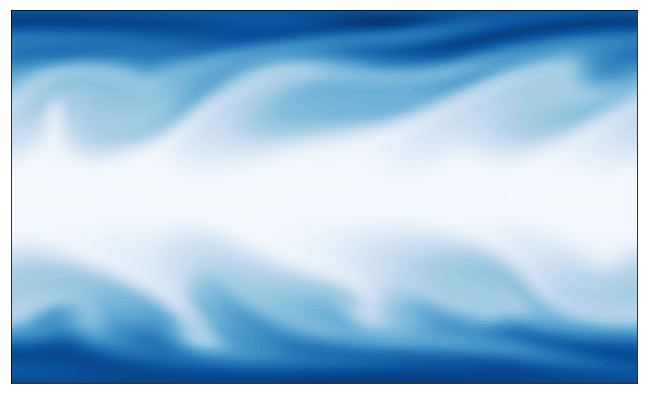

In [2]:
from igcm_func import igcm_Plot

lev=29
plot=0             #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=1.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

caption=False   #set equal to true to have a caption
cap='P=6.909 days'  #caption in top right

ortho=False #orthographic projection
latcenter=0.0       #center of plot in degrees
loncenter=0.0

freeze=False         #adds a black line at water freezing temperature,useful for earth

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''

if plot<4:
    savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'
else:
    savename=path+runname+'/'+ptype+pstyle+'.pdf'
print savename

ver=True           #verbose output, PLOTS AND TEXT

cbarL=0#255 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0#323 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

%matplotlib inline
#for l in range(0,30):
#    lev=l
#    savename=path+runname+'/Streams/'+str(runname)+'_'+ptype+str(int(lev))+pstyle+'.pdf'
#    igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,caption,cap,
#              savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False,True)

savename='/Users/ermay/Desktop/TALK_F_3.png'

igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,caption,cap,
              savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,False,True)



# -------------------------------------
# Longitudinally Averaged Plots #

In [1]:
from igcm_func import lon_avg

path='Files/'#FiducialPlanet/Model4/L10/T42/'
runname='EARTH_T42_o/'
oom=0
p0=1.0

pres_plot=1.0

plot=0              #0=temp, 1=U wind, 2=V wind,
lo=True            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.93 #top point of line labels (in 0-1)

noy=False  #don't plot y labels
a_lines=True
nfiles=10

%matplotlib inline

#test=lon_avg(plot,savepath,data_26,lon_arr,lat_arr,lev,lo,ln,tn,noy)
lon_avg(plot,path,runname,oom,p0,pres_plot,lo,ln,tn,noy,a_lines,nfiles)


 DOING LAST ORBIT AVERAGES....
  
 ....reading  fort.2600
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE


KeyboardInterrupt: 

In [15]:
from igcm_func import lon_avg_comp

#this only works right now for same resolution plots!

# runnames=['P0_001','P0_005','P0_010','P0_015','P0_020']
# ooms=[0,0,0,0,0]
# p0s=[0.01,0.05,0.10,0.15,0.20]
# labels=['0.01 bar','0.05 bar','0.10 bar','0.15 bar','0.20 bar']

runnames=['EARTH_T10','EARTH_T21','EARTH_T42','EARTH_T63']
ooms=[0,0,0,0]
p0s=[1.0,1.0,1.0,1.0]
labels=['T10','T21','T42','T63']

path='Files/'
pres_plot=1.0  #currently LW photosphere
plot=1              #0=temp, 1=U wind, 2=V wind,
lo=False            #last orbit average
ln=0.2  #left point of line labels (in 0-1)
tn=0.73 #top point of line labels (in 0-1)

nfiles=90

%matplotlib inline
test=lon_avg_comp(path,plot,pres_plot,lo,ln,tn,runnames,ooms,p0s,labels,nfiles)




------ EARTH_T10 ------
  
 ....reading  fort.26
       nlat= 16 nlon= 32 nlev= 30
       END OF FILE: DONE
closest level to  1.0  BARS is # 29
 
------ EARTH_T21 ------
  
 ....reading  fort.26
       nlat= 32 nlon= 64 nlev= 30
       END OF FILE: DONE
closest level to  1.0  BARS is # 29


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [2]:
## Maybe you want a movie showing the last orbit....
import numpy as np
import imageio
import os
from igcm_func import igcm_Plot

from load_data_noin import load_data

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runname='EARTH_T42'#FiducialPlanet/PostSurf/RESTART/'#NewOutModel4/'
#runname='FiducialPlanet/Model4/L10/T42/P0_001/'
oom=0
surfp=1.0
LastOrbit_=False
OLR_=False

verbose=False


lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=2.0           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=False         #orthographic projection
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=0.0 

freeze=False         #adds a black line at water freezing temperature, useful for earth
caption=False   #set equal to true to have a caption
cap='P=6.909 days'  #caption in top right

savefig=True
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'
if plot==3:
    ptype='STREAM'

if ortho==True:
    pstyle='_ortho'
else:
    pstyle=''
    
#savename=path+runname+'/'+ptype+str(int(lev))+pstyle+'.pdf'

ver=False           #verbose output, PLOTS AND TEXT

cbarL=0#useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0   #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature
cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

savepath=path+runname+'/LastOrb_F/'

for t in range(0,90):
    fort_file='fort.26'+str.zfill(str(int(t)),2)
    lo=False  #holder for last orbit
    savename=savepath+str.zfill(str(int(t)),4)+'.png'
    runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo,data_olr=load_data(path,runname,oom,surfp,LastOrbit_,OLR_,verbose,fort_file)

    igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,freeze,caption,cap,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac,lo,False)
    print '....done'
    
file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'lastorb.gif',images,duration=0.35)

  
 ....reading  fort.2600
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2601
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2602
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2603
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2604
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2605
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2606
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2607
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2608
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2609
       nlat= 64 nlon= 128 nlev= 30
       END OF FILE: DONE
....done
  
 ....reading  fort.2610
       nlat= 

KeyboardInterrupt: 

-------------------------------------------------------
Min UWind [m/s], Plot limit:  -50.83300018310547 -134.0
Max UWind [m/s], Plot limit:  133.89999389648438 134.0
-------------------------------------------------------
(30, 64)


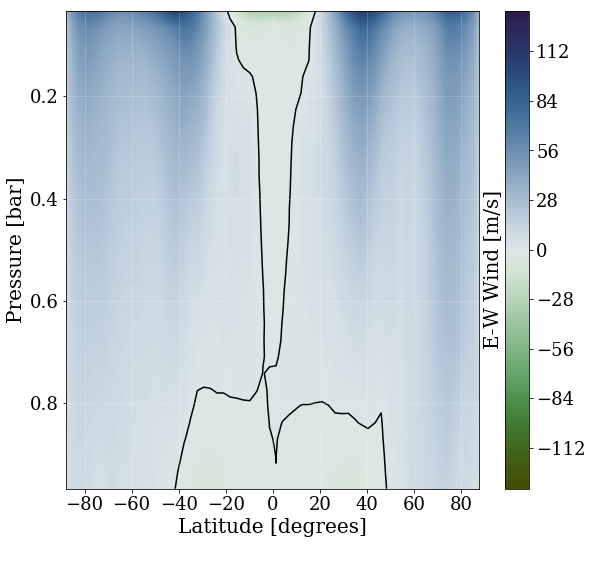

In [2]:
from press_Plot import press_Plot

plot=1             #0 to plot temps, 1 to plot E-W winds, 2=N-S winds. (USUALLY ONLY T AND E-W USED) 

longavg=True       #if True, longavg
long_pl=0.0         #if longavg=True, ignored, otherwise longitude to plot at

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

caption=True   #set equal to true to have a caption
cap='P=2.578 days'  #caption in top right
freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0

zeros=True #draw a contour line at 0
freeze=False         #adds a black line at water freezing temperature,useful for earth only works for plot=0


ver=True           #verbose output, PLOTS AND TEXT

cbarL=0 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0 #useful for multiple plots --- force upper limit of colorbars
ex=1    # if you want to extend the colorbar. Default is 1 for temperature

cbar_even=True      #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

lo=False            #if True, average of last orbit is used

savefig=True

##########################################################
if plot==0:
    ptype='TEMPS'
if plot==1:
    ptype='UWIND'
if plot==2:
    ptype='VWIND'

    
savename=path+runname+'/Pressure_'+ptype
##########################################################


%matplotlib inline
press_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,units_a,units_t,units_w,freeze, caption, cap,
          savefig,savename,zeros,ver,cbarL,cbarM,cbar_even,ex,ncolors,longavg,long_pl,lo,oom)


----- P0_001 -----
/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/FiducialPlanet/Model4/L10/T42/P0_001
9 0.00909090909090909
  
 ....reading  fort.2600
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2601
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2602
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2603
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2604
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2605
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2606
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2607
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2608
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2609
       nlat= 64 nlon= 128 nlev= 10
       END

  
 ....reading  fort.2601
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2602
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2603
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2604
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2605
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2606
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2607
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2608
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2609
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2610
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2611
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2612
       nlat= 64 

       END OF FILE: DONE
  
 ....reading  fort.2604
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2605
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2606
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2607
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2608
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2609
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2610
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2611
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2612
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2613
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  fort.2614
       nlat= 64 nlon= 128 nlev= 10
       END OF FILE: DONE
  
 ....reading  f

KeyboardInterrupt: 

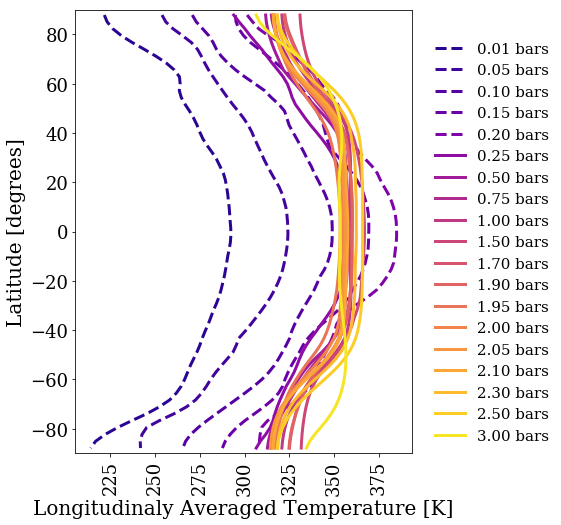

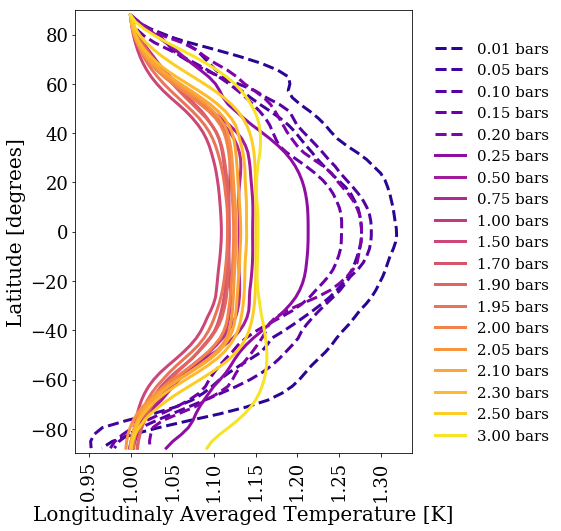